In [1]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pandas.read_csv('prepared_data.csv')
dataset.head(10) 

,Unnamed: 0,base_fond,science_fond,ams,n_buildings,n_days,guests,employees
0,0,0.871895,0.202756,0.000000,0.000000,0.766166,0.282280,0.535886
1,1,0.665213,0.234009,0.382426,0.761119,0.792314,0.708320,0.683933
2,2,0.819225,0.141986,0.000000,0.000000,0.467037,0.361896,0.535886
3,3,-0.220496,0.109362,0.224544,0.000000,0.977598,0.510593,0.426908
4,4,0.407500,0.257876,0.178410,0.191564,0.467037,0.180420,0.298396
5,5,0.695033,0.233109,0.206519,0.000000,0.504912,0.208125,0.203687
6,6,-1.312439,0.041231,0.000000,0.000000,0.739504,0.806222,0.624310
7,7,-0.230401,0.079373,0.194525,0.000000,0.504912,0.095975,0.128512
8,8,0.200020,0.155885,0.111086,0.338555,0.774938,0.298967,0.555421
9,9,-0.787443,0.097057,0.000000,0.000000,0.562371,0.151317,0.203687


In [3]:
# Выделение входных и выходных параметров:
# Выходной параметр - значение столбца обработанного набора данных, соответсвующее столбцу №8 из первоначального набора данных (machine.data.csv).
# Входные параметры - все остальные столбцы обработанного набора данных.
# Используем .values, чтобы индексы не попали в новые переменные и в дальнейшем не мешали нам, например, при построении графиков.
X = dataset.iloc[:, 1:7].values
Y = dataset['guests'].values

# Обратите внимание на структуру вашего обработанного файлы и измените индексы, если нужно.

In [4]:
# Разделение данных на обучающую и тестовую выборки:
# Используем метод train_test_split библиотеки sklearn.
# Он разделяет заданные массивы входных и выходных параметров на две части каждый.
# Значение test_size определяет долю тестовой выборки в исходных данных.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [220]:
# Задаем параметры структуры нейронной сети.

# Количество нейронов во входном слое должно быть равно количеству входных параметров.
input_layer_size = 6

# Количество нейронов в каждом скрытом слое и количество таких слоёв могут быть выбраны произвольно.
# Увеличение числа нейронов относительно предыдущего слоя позволяет лучше обрабатывать отдельные примеры.
# Уменьшение числа нейронов относительно предыдущего слоя позволяет обощать информацию и выводить новые правила.
# Увеличение числа слоёв помогает сети работать как более сложная функция.
first_hidden_layer_size = 20
second_hidden_layer_size = 20

# Количество нейронов в выходном слое должно быть равно количеству выходных параметров.
output_layer_size = 1

# Параметры обучения нейронной сети: количество эпох и размер батча.
epochs_number = 50
batch_size = 100

In [221]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

# Второй скрытый слой, функция активации - ReLU
model.add(Dense(second_hidden_layer_size, activation='relu'))

# Выходной слой, функция активации - линейная, т.к. решается задача регрессии.
model.add(Dense(output_layer_size, activation='linear'))

In [222]:
# Обзор нейронной сети, теперь в ней есть слои и нейроны.
# Если внимательно посмотреть на количество параметров, т.е. связей между нейронами, то можно увидеть, что автоматически добавлены нейроны смещения.
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 20)                140       
_________________________________________________________________
dense_50 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 21        
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [223]:
# Настройка нейронной сети.
# Функция потерь (loss) - среднеквадратическая ошибка.
# Оптимизатор (optimizer) - adam (в настоящий момент - это стандартный оптимизатор).
# Указываем метрики средняя абсолютная ошибка (mean_absolute_error) и среднеквадратическая ошиба (mean_squared_error) для дальнейшего анализа.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [224]:
# Обучение нейронной сети.
# На вход передаем обучающие и тестовые выборки, количество эпох и размер батча.
# На выходе получаем объект с историей обучения, который далее будем анализировать.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 1819 samples, validate on 455 samples
Epoch 1/50
1819/1819 [==============================] - 0s 118us/step - loss: 0.0936 - mean_absolute_error: 0.2430 - mean_squared_error: 0.0936 - val_loss: 0.0351 - val_mean_absolute_error: 0.1309 - val_mean_squared_error: 0.0351
Epoch 2/50
1819/1819 [==============================] - 0s 42us/step - loss: 0.0248 - mean_absolute_error: 0.1071 - mean_squared_error: 0.0248 - val_loss: 0.0199 - val_mean_absolute_error: 0.1031 - val_mean_squared_error: 0.0199
Epoch 3/50
1819/1819 [==============================] - 0s 46us/step - loss: 0.0172 - mean_absolute_error: 0.0951 - mean_squared_error: 0.0172 - val_loss: 0.0153 - val_mean_absolute_error: 0.0893 - val_mean_squared_error: 0.0153
Epoch 4/50
1819/1819 [==============================] - 0s 23us/step - loss: 0.0137 - mean_absolute_error: 0.0820 - mean_squared_error: 0.0137 - val_loss: 0.0127 - val_mean_absolute_error: 0.0805 - val_mean_squared_error: 0.0127
Epoch 5/50
1819/1819 [==============

1819/1819 [==============================] - 0s 49us/step - loss: 2.6601e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.6601e-04 - val_loss: 2.8904e-04 - val_mean_absolute_error: 0.0120 - val_mean_squared_error: 2.8904e-04
Epoch 36/50
1819/1819 [==============================] - 0s 20us/step - loss: 2.5303e-04 - mean_absolute_error: 0.0118 - mean_squared_error: 2.5303e-04 - val_loss: 2.6568e-04 - val_mean_absolute_error: 0.0117 - val_mean_squared_error: 2.6568e-04
Epoch 37/50
1819/1819 [==============================] - 0s 36us/step - loss: 2.4140e-04 - mean_absolute_error: 0.0114 - mean_squared_error: 2.4140e-04 - val_loss: 2.5253e-04 - val_mean_absolute_error: 0.0114 - val_mean_squared_error: 2.5253e-04
Epoch 38/50
1819/1819 [==============================] - 0s 47us/step - loss: 2.2826e-04 - mean_absolute_error: 0.0111 - mean_squared_error: 2.2826e-04 - val_loss: 2.4168e-04 - val_mean_absolute_error: 0.0110 - val_mean_squared_error: 2.4168e-04
Epoch 39/50
1819/1819 [=====

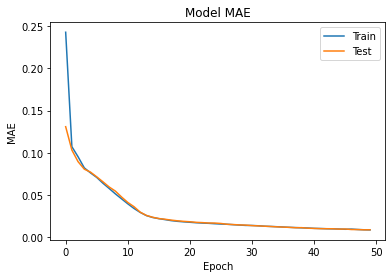

In [225]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

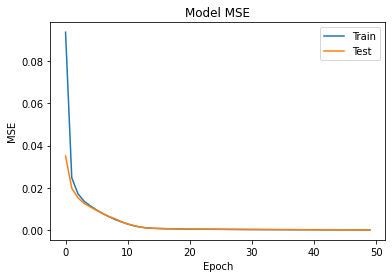

In [226]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
# Видно, что в процессе обучения сеть с каждой эпохой вычисляет всё более точные прогнозы значений Y.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [227]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

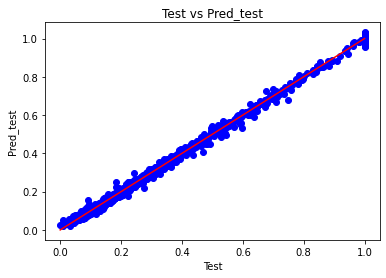

In [228]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
# В идеальной ситуации они должны совпадать, т.е. точки (Y_train[i], Y_pred_train[i]) должны лежать на прямой Y_train = Y_pred_train.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

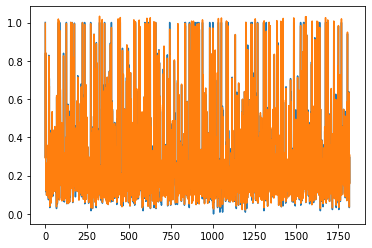

In [229]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [230]:
# Таким образом, обучение по обучающей выборке проведено.
# Теперь проверим работу нейроной сети на тестовой выборке.

# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

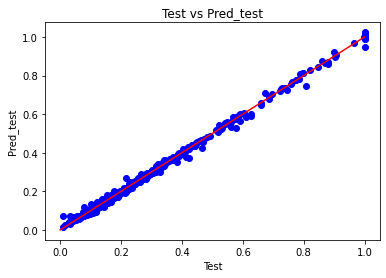

In [231]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

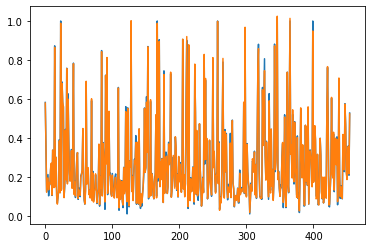

In [232]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [233]:
# Итого, качество работы нейронной сети на тестовых данных ниже, чем на обучающих - это ожидаемо.
# Тем не менее, нейронная сеть способна найти зависимости и предсказвать значение Y по X с приемлемым уровенм точности.

# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(numpy.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(numpy.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.011581183035570064
0.01209789435755013


In [234]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
# Для этого используем библиотеку scipy и метод stats.shapiro.
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9446826577186584, p = 1.4314271857902376e-25
Test k = 0.9223705530166626, p = 1.4145742445513618e-14


In [235]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9403448104858398, p_s = 2.468979144591413e-29
k_n = 249.46604573759734, p_n = 6.747400002546841e-55


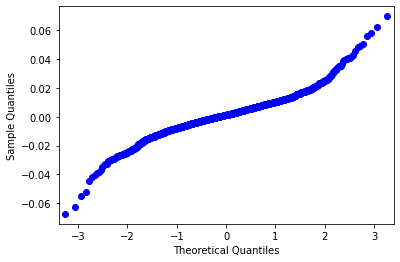

In [236]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

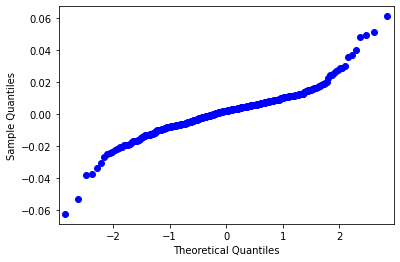

In [237]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

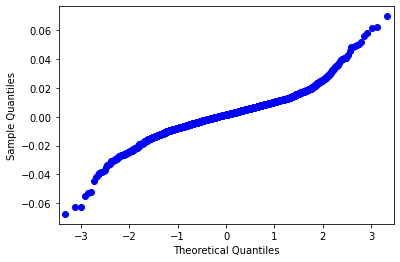

In [238]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

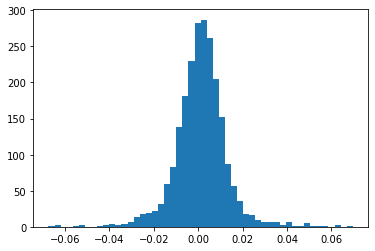

In [239]:
# Можо также визульно убедиться, что распределения "почти нормальное".
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [ ]:
# Сохраним обученную нейронную сеть, название файла можно выбрать любое, расширение - h5.
model.save('SimpleNeuralNetwork.h5')